In [20]:
import numpy as np
import pandas as pd
import seaborn as sns

In [11]:
dataset = "complex_traits_matched_9"

V = pd.read_parquet(f"../../results/dataset/{dataset}/test.parquet").query("label")
V.trait = V.trait.str.split(",")
V

,chrom,pos,ref,alt,pip,trait,label,maf,ld_score,consequence,tss_dist,match_group
8,1,2293397,G,A,0.999932,[Height],True,0.370570,32.3020,dELS,65077,dELS_0
17,1,3080038,T,C,0.999895,"[MCH, MCV, Plt, RBC]",True,0.232720,31.6060,dELS,10826,dELS_1
26,1,3774964,A,G,0.999973,"[Hb, HbA1c, MCHC, RBC]",True,0.230570,95.3170,dELS,2138,dELS_2
60,1,9181780,G,A,1.000000,"[AST, Mono]",True,0.074322,35.4720,non_coding_transcript_exon_variant,52677,non_coding_transcript_exon_variant_0
61,1,9295877,G,T,0.993319,[DVT],True,0.265060,46.3070,dELS,1348,dELS_3
...,...,...,...,...,...,...,...,...,...,...,...,...
11354,22,45969257,G,A,0.999905,[eBMD],True,0.002641,9.5349,dELS,3457,dELS_207
11355,22,45979731,C,T,0.980260,[eBMD],True,0.167140,37.7760,dELS,2568,dELS_208
11359,22,46219479,G,A,0.945802,[BW],True,0.128710,164.8500,dELS_flank,28805,dELS_flank_108
11372,22,47990921,C,T,0.997536,[BMI],True,0.437610,53.5140,intron_variant,498631,intron_variant_124


In [13]:
V["n_traits"] = V.trait.apply(len)
V["n_traits"].value_counts()

n_traits
1     847
2     175
3      62
4      24
5      15
6       5
7       5
9       3
8       2
16      1
12      1
Name: count, dtype: int64

In [44]:
V.sort_values("n_traits", ascending=False).head(10)

,chrom,pos,ref,alt,pip,trait,label,maf,ld_score,consequence,tss_dist,match_group,n_traits
6933,12,4275678,T,G,1.000000,"[ALT, Alb, BW, GGT, Glucose, HbA1c, LDLC, PP, ...",True,0.020790,9.3736,non_coding_transcript_exon_variant,1915,non_coding_transcript_exon_variant_17,16
7493,13,28029870,T,C,1.000000,"[AG, AID_Combined, ApoA, HDLC, Hypothyroidism,...",True,0.012962,17.5800,intron_variant,41176,intron_variant_46,12
9119,17,7668434,T,G,1.000000,"[ApoA, BW, DBP, Height, LOY, MCH, MCV, PP, RBC]",True,0.012616,31.4000,3_prime_UTR_variant,5152,3_prime_UTR_variant_20,9
9805,18,63253621,C,T,1.000000,"[Baso, LOY, MCH, MCV, Mono, Neutro, Plt, RBC, ...",True,0.029422,6.1212,dELS,65190,dELS_131,9
9801,18,63178651,T,C,0.999994,"[ALT, Alb, BW, GGT, IGF1, SHBG, T2D_BMI, TG, W...",True,0.376440,17.3220,dELS,16781,dELS_129,9
490,1,109928142,G,A,1.000000,"[AST, Alb, Lym, Mono, Plt, TP, WBC, eGFRcys]",True,0.149390,27.5320,dELS,17155,dELS_16,8
4518,7,92779056,C,T,1.000000,"[ALT, Baso, Eosino, GGT, Mono, Neutro, SHBG, WBC]",True,0.094373,41.2640,dELS,54860,dELS_281,8
2563,4,3442204,A,G,1.000000,"[ALT, ApoB, Ca, GGT, IGF1, TC, TG]",True,0.382460,100.5300,PLS_flank,228,PLS_flank_10,7
2420,3,172576710,G,A,1.000000,"[ALT, AST, GGT, Hb, Plt, SHBG, TG]",True,0.031253,25.4890,intron_variant,53234,intron_variant_137,7
7652,13,113272893,G,T,1.000000,"[ALP, AST, ApoA, CRP, HDLC, Neutro, WBC]",True,0.250950,26.5690,dELS,24345,dELS_80,7


/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


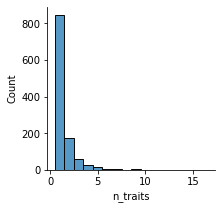

In [43]:
plt.figure(figsize=(3, 3))
g = sns.histplot(V["n_traits"], discrete=True)
sns.despine();

/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


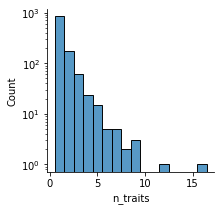

In [42]:
plt.figure(figsize=(3, 3))
g = sns.histplot(V["n_traits"], discrete=True)
g.set_yscale("log")
sns.despine();

In [34]:
n_variants_per_trait = (
    pd.Series(np.concatenate(V.trait.values), name="trait")
    .value_counts().reset_index().rename(columns={"count": "n_variants"})
)
n_variants_per_trait

,trait,n_variants
0,Height,77
1,Plt,67
2,eBMD,67
3,MCV,66
4,Mono,65
...,...,...
78,Mood_Swings,1
79,IBD,1
80,CRC,1
81,Fibroblastic_Disorders,1


/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


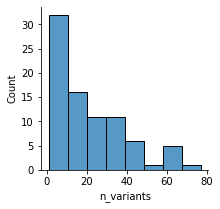

In [41]:
plt.figure(figsize=(3, 3))
g = sns.histplot(data=n_variants_per_trait, x="n_variants")
sns.despine();